In [1]:
# importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets

In [3]:
# Data collection and processing

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Get the target/prediction value in the dataset
df['label'] = breast_cancer_dataset.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
df.shape

(569, 31)

In [7]:
# Check for the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
# prompt: get the count of unique values repetitions in the column 'label' in df

# Check if the dataset is balanced
df['label'].value_counts()


,count
label,
1,357
0,212


In [9]:
# Since the dataset isn't balanced, we have to balance it.
# For that:
from sklearn.utils import resample

df_minority = df[df['label'] == 0]
df_majority = df[df['label'] == 1]

df_minority_oversampled = resample(df_minority,
                                   replace=True,     # With replacement
                                   n_samples=len(df_majority), # Match majority count
                                   random_state=42)

# Combine with majority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced['label'].value_counts()  # Check new distribution

,count
label,
1,357
0,357


In [10]:
df=df_balanced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              714 non-null    float64
 1   mean texture             714 non-null    float64
 2   mean perimeter           714 non-null    float64
 3   mean area                714 non-null    float64
 4   mean smoothness          714 non-null    float64
 5   mean compactness         714 non-null    float64
 6   mean concavity           714 non-null    float64
 7   mean concave points      714 non-null    float64
 8   mean symmetry            714 non-null    float64
 9   mean fractal dimension   714 non-null    float64
 10  radius error             714 non-null    float64
 11  texture error            714 non-null    float64
 12  perimeter error          714 non-null    float64
 13  area error               714 non-null    float64
 14  smoothness error         7

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,14.836763,19.815840,96.968613,726.498319,0.097303,0.112317,0.103089,0.056617,0.182656,0.062602,...,26.363039,114.761863,1005.942017,0.134326,0.273978,0.300454,0.127194,0.293304,0.084576,0.500000
std,3.784623,4.266187,26.165788,396.598521,0.013485,0.054016,0.084134,0.041322,0.025936,0.006874,...,6.082779,37.029045,664.989117,0.021875,0.157194,0.205317,0.066818,0.062238,0.017282,0.500351
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,12.077500,17.005000,77.872500,449.450000,0.087600,0.069367,0.035175,0.023242,0.163875,0.057645,...,22.020000,86.730000,546.700000,0.120175,0.160775,0.137800,0.073758,0.255450,0.072220,0.000000
50%,14.085000,19.510000,92.460000,610.300000,0.097175,0.104300,0.084350,0.048270,0.180900,0.061670,...,25.840000,107.200000,798.650000,0.134700,0.235600,0.273500,0.121950,0.284650,0.081350,0.500000
75%,17.200000,22.290000,111.650000,930.900000,0.105775,0.138900,0.152450,0.086240,0.195700,0.065780,...,30.427500,136.400000,1297.250000,0.149175,0.373500,0.423400,0.177500,0.319525,0.093330,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.274300,0.097440,...,47.160000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.173000,1.000000


In [12]:
X = df.drop(['label'], axis=1)
Y = df['label']

In [13]:
# splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [25]:
## Applying standardization to the data
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [27]:
###### BUILDING THE NEURAL NETWORK

In [28]:
# import tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [50]:
# setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # turns the multidimensional array into a 1d array
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
# Compiling the Neural network

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [52]:
### Training the Neural Network

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4891 - loss: 0.7933 - val_accuracy: 0.6500 - val_loss: 0.6084
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7064 - loss: 0.5452 - val_accuracy: 0.7800 - val_loss: 0.4416
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8599 - loss: 0.3933 - val_accuracy: 0.8500 - val_loss: 0.3451
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9064 - loss: 0.3027 - val_accuracy: 0.9100 - val_loss: 0.2854
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9409 - loss: 0.2475 - val_accuracy: 0.9100 - val_loss: 0.2445
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9529 - loss: 0.2109 - val_accuracy: 0.9200 - val_loss: 0.2141
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9580 - loss: 0.1843 - val_accuracy: 0.9200 - val_loss: 0.1906
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9621 - loss: 0.1642 - val_accuracy: 0.9300 - v

In [53]:
## Visualize accuracy and loss
print(history.history)

{'accuracy': [0.5338345766067505, 0.7293233275413513, 0.8621553778648376, 0.9072681665420532, 0.9298245906829834, 0.9423558712005615, 0.9448621273040771, 0.9498746991157532, 0.9498746991157532, 0.9573934674263], 'loss': [0.7463376522064209, 0.5186610221862793, 0.3806343674659729, 0.29849013686180115, 0.24785754084587097, 0.21360380947589874, 0.18857750296592712, 0.1694352924823761, 0.15434962511062622, 0.14213763177394867], 'val_accuracy': [0.6499999761581421, 0.7799999713897705, 0.8500000238418579, 0.9100000262260437, 0.9100000262260437, 0.9200000166893005, 0.9200000166893005, 0.9300000071525574, 0.9399999976158142, 0.949999988079071], 'val_loss': [0.6084212064743042, 0.44163352251052856, 0.345131516456604, 0.28539028763771057, 0.2445296049118042, 0.2140507698059082, 0.19063477218151093, 0.17229558527469635, 0.15761186182498932, 0.145558163523674]}


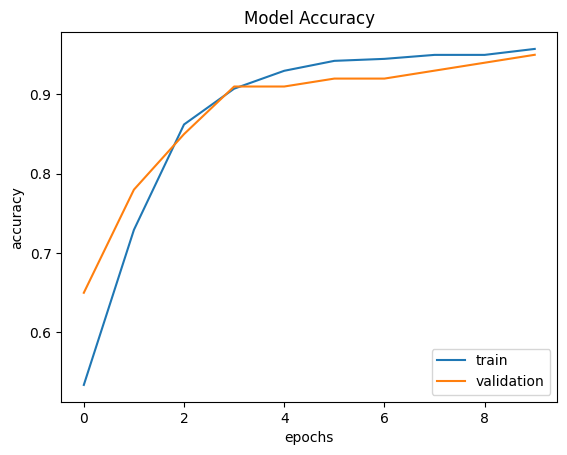

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend(['train', 'validation'], loc='lower right')


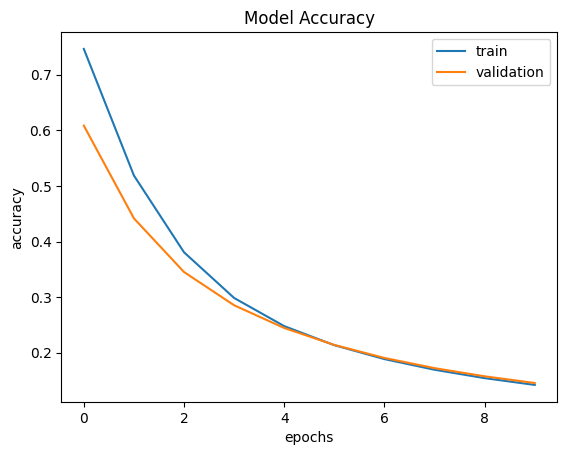

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['train', 'validation'], loc='upper right')


# **Building the predictive system**

In [56]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy: ", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8769 - loss: 0.2359
Accuracy:  0.9116278886795044


In [57]:
print(X_test.shape)
print(X_test[0])

(215, 30)
[-0.03469898 -1.37559417  0.05023461 -0.17441535  0.44943677  1.3015624
  0.50226812  0.14990693  1.01636182  1.63289458  0.23740498  0.57124494
  0.58619844 -0.00982586  0.9185385   1.37596163  0.78614608  0.49256172
  0.80020049  0.63261877 -0.15903427 -1.33309168 -0.0177723  -0.28996019
 -0.12263002  0.55691173  0.10138315 -0.24788091 -0.15833768  0.42978786]


In [65]:
y_pred = list(map(lambda x: 0 if x < 0.5 else 1, model.predict(X_test)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [68]:
print(y_pred)

[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1]


**Starting to build predictive system**

In [75]:
input_data = (14.71,21.59,95.55,656.9,0.1137,0.1365,0.1293,0.08123,0.2027,0.06758,0.4226,1.15,2.735,40.09,0.003659,0.02855,0.02572,0.01272,0.01817,0.004108,17.87,30.7,115.7,985.5,0.1368,0.429,0.3587,0.1834,0.3698,0.1094
)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardising the input data
input_data_std = scaler.transform(input_data_reshaped)

# Prediction
prediction = model.predict(input_data_std)
print(prediction)

prediction_label = list(map(lambda x: 0 if x < 0.5 else 1, prediction))

if(prediction_label == 0):
  print("The tumor is Malignant.")
else:
  print("The tumor is Benign.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.1679428]]
The tumor is Benign.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
